*Author: Tarun Kumar*

#GRIP : The Sparks Foundation

##Task 1 : Prediction Using Supervised ML

In this task we have to predict the percentage score of a student based on the number of hours studied. The task has 2 variables where the feature is no. of hours studied and target value is the percentage score. This can be solved using Simple Linear Regression.

Importing the Dependencies:

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

Loading the data into pandas dataframe from a URL:

In [101]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

#Data Preprocessing and Analyisis:

In [102]:
#checking the first five rows of the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


As we can see, there are two columns in our dataset, Hours and Scores. 

In [103]:
#checking the number of rows and columns

df.shape

(25, 2)

There are 25 rows and 2 columns.


In [104]:
#getting more information about the dataset:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [105]:
#getting all the statistical mesaures about the dataset

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Here we can see that the maximum no of hours a student studies and also the maximum and minimum scores and many other details. 

In [106]:
#checking the null values in the dataset

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

As we can see there is no null value in our dataset which is a plus point for us. As if there had been any missing values then we will have to handle those missing values. Either by dropping them or by replacing them with some other values like mean, median. Here we can't drop the values as there is very less data. 

#Data Visualisation:

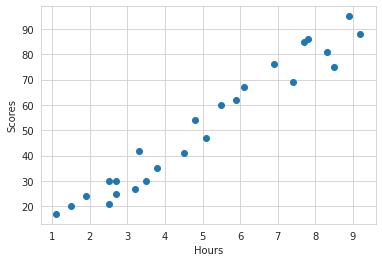

In [107]:
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.scatter(df.Hours,df.Scores)

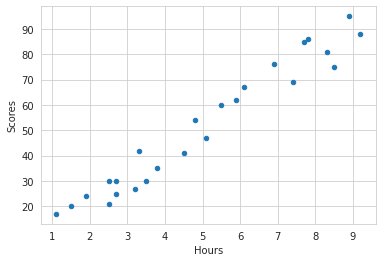

In [108]:
df.plot(kind='scatter',x='Hours',y='Scores')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


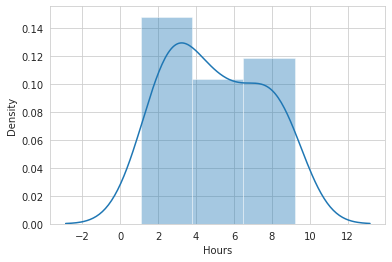

In [109]:
#distribution plot for hours column
hours = df['Hours']
scores = df['Scores']
sns.distplot(hours)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


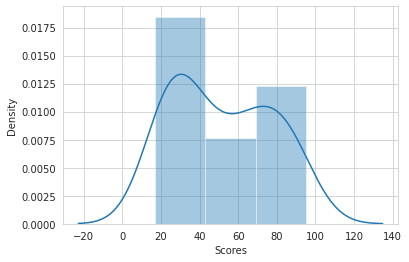

In [110]:
sns.distplot(scores)

**Correlation:** It explains how one or more variables are related to each other. These variables can be input data features which have been used to forecast our target variable. Correlation, statistical technique which determines how one variables moves/changes in relation with the other variable.

In [111]:
correlation = df.corr()
correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


For observing the correlation on the graph we can use the heat map. 

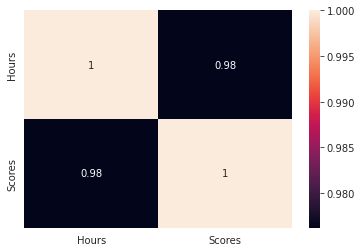

In [112]:
sns.heatmap(correlation,annot=True)

As we can see there is a very strong correlation between the number of hours and the scores. Which means a student who studies for longer period of time tends to score more marks and vice versa. 

Seperating the features and target columns:

In [113]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [114]:
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [115]:
#checking the shape of X and y

print(X.shape, y.shape)

(25, 1) (25,)


**Splitting the data into Train data and Test data:**

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [117]:
print(X.shape, X_train.shape, X_test.shape)

(25, 1) (20, 1) (5, 1)


#Model Training

In [118]:
#laoding an instance of the model to use

model = LinearRegression()

In [119]:
#training the model

model.fit(X_train,y_train)

LinearRegression()

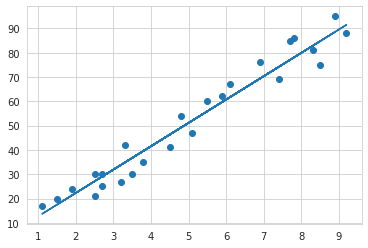

In [120]:


m = model.coef_
c = model.intercept_
line = m*X + c
plt.scatter(X, y)
plt.plot(X,line)
plt.show()

In [121]:
#Predictions using our model:

y_pred = model.predict(X_test)

In [122]:
actual_predicted = pd.DataFrame({'Target(Scores)':y_test,'Predicted(Scores)':y_pred})
actual_predicted

,Target(Scores),Predicted(Scores)
0,69,74.174939
1,67,61.688457
2,27,33.833997
3,85,77.056435
4,54,49.201975


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


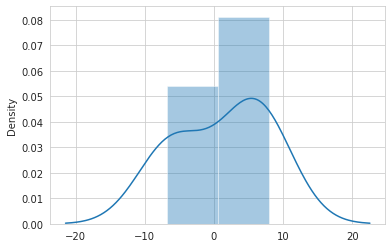

In [123]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

*What would be the score if the student studies for 9.25 hours?*

In [124]:
h = 9.25
s = model.predict([[h]])
print("If a student studies for {} hours per day he/she will score {} % in exam !!".format(h,s[0]))

If a student studies for 9.25 hours per day he/she will score 91.94416404722054 % in exam !!


#Model Evaluation

In [125]:
from sklearn import metrics
from sklearn.metrics import r2_score
print(" Mean Absolute Error:: ",metrics.mean_absolute_error(y_test,y_pred))
print(" R2 Score:: ",r2_score(y_test,y_pred))

 Mean Absolute Error::  6.0124137623905725
 R2 Score::  0.9000546706590143
